In [2]:
#https://www.earthdatascience.org/courses/earth-analytics/get-data-using-apis/text-mining-twitter-data-intro-r/

In [3]:
#install.packages('rtweet')
#packageVersion("rtweet")
#sessionInfo()

In [132]:
#install.packages('tidytext')
#install.packages("ggplot2")
#install.packages("tidyverse")


also installing the dependencies 'bit', 'ps', 'rappdirs', 'rematch', 'bit64', 'processx', 'highr', 'yaml', 'xfun', 'tinytex', 'jquerylib', 'backports', 'assertthat', 'blob', 'DBI', 'data.table', 'cli', 'gargle', 'cellranger', 'ids', 'rematch2', 'cpp11', 'clipr', 'vroom', 'tzdb', 'callr', 'fs', 'knitr', 'rmarkdown', 'selectr', 'broom', 'crayon', 'dbplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'jsonlite', 'lubridate', 'modelr', 'readr', 'readxl', 'reprex', 'rstudioapi', 'rvest', 'tidyr', 'xml2'




  There are binary versions available but the source versions are later:
              binary source needs_compilation
xfun            0.22   0.26              TRUE
tinytex         0.31   0.34             FALSE
blob           1.2.1  1.2.2             FALSE
data.table    1.14.0 1.14.2              TRUE
cli            2.5.0  3.0.1              TRUE
gargle         1.1.0  1.2.0             FALSE
cpp11          0.2.7  0.4.0             FALSE
vroom          1.4.0  1.5.5              TRUE
tzdb           0.1.1  0.1.2              TRUE
knitr           1.33   1.36             FALSE
rmarkdown        2.8   2.11             FALSE
broom          0.7.6  0.7.9             FALSE
googledrive    1.0.1  2.0.0             FALSE
googlesheets4  0.3.0  1.0.0             FALSE
haven          2.4.1  2.4.3              TRUE
lubridate     1.7.10  1.8.0              TRUE
readr          1.4.0  2.0.2              TRUE
reprex         2.0.0  2.0.1             FALSE
rvest          1.0.0  1.0.1             FALSE
tidyr 

Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\alder\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll  a C:\Users\alder\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'lubridate' successfully unpacked and MD5 sums checked
package 'modelr' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'readxl' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'xml2' successfully unpacked and MD5 sums checked
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alder\AppData\Local\Temp\Rtmpyu78Nz\downloaded_packages


installing the source packages 'tinytex', 'blob', 'gargle', 'cpp11', 'knitr', 'rmarkdown', 'broom', 'googledrive', 'googlesheets4', 'reprex', 'rvest'

Warning message in install.packages("tidyverse"):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"

In [7]:
library(tidytext)
library(rtweet)
library(ggplot2)
#library(tidyverse)
library(dplyr)

In [124]:
api_key <- "#"
api_secret <- "#"
bearer_token <- "#"
appname <- "estructura_2021"
access_token <- "#"
access_token_secret <- "#"
geocodeinr= "-23.858436,-56.329842,1000mi"

token <- create_token(app = appname, consumer_key = api_key, consumer_secret = api_secret, access_token=access_token, access_secret=access_token_secret)


In [125]:
since= "2021-10-14"
until = "2021-10-17"

resultado_1 <- search_tweets(q="virus", n = 2000,  retryonratelimit = TRUE, lang= 'es', 
                      geocode= geocodeinr, since = since, until= until, tweet_mode='extended' )


In [126]:
head(resultado_1, n=1)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
2302337486,1449523751918264321,2021-10-16 23:52:47,villegasa69,"@sergiomendozaco @PrezGana No, no es, ni nunca ha sido lo mejor sacar plata d jubilación. Pero, la pandemia trajo + q el virus. Nadie puede vivir con sueldos de hambre y - aún ahora, q los trabajos están por el suelo y se siguen aprovechando los empresarios. El tema es más complejo. Tú, tienes la fórmula?",Twitter for Android,279,1449519167774748676,37443984,sergiomendozaco,...,51281,37574,2014-01-21 02:16:08,FALSE,NA,NA,NA,https://pbs.twimg.com/profile_banners/2302337486/1633720896,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1440349071584026625/qSPl4uDG_normal.jpg


In [3]:
resultado_1$status_id[1]

[1] "1449523751918264321"

In [127]:
resultado_1$text[1]
#resultado_1$text

[1] "@sergiomendozaco @PrezGana No, no es, ni nunca ha sido lo mejor sacar plata d jubilación. Pero, la pandemia trajo + q el virus. Nadie puede vivir con sueldos de hambre y - aún ahora, q los trabajos están por el suelo y se siguen aprovechando los empresarios. El tema es más complejo. Tú, tienes la fórmula?"

In [128]:
#funcion que limpia emojis, url, menciones y otros
clean_text <- function(resultado) {
  
   
    #menciones
    resultado$cleaned_text <- gsub('@[^ ]*','',resultado$text)

    #urls
    #resultado$cleaned_text <- gsub('https://t.co/[a-z,A-Z,0-9]*','',resultado_1$cleaned_text)
    #resultado$cleaned_text <- gsub('http\\w+','',resultado_1$cleaned_text)
    #de https://t.co/kMeVbuSQhE no borra kMeVbuSQhE
    #resultado$cleaned_text <- gsub('https:(?!.*@).*$','',resultado_1$cleaned_text)

    #urls
    #  funciona en julia http\S+
    resultado$cleaned_text <- gsub('http.+','',resultado$cleaned_text)


    #hashtag
    resultado$cleaned_text <- gsub('#[^ ]*','',resultado$cleaned_text)

    #remueve hashtag pero falla cuando hay acento
    #resultado$cleaned_text <- gsub('#[A-Za-z0-9]+|@[A-Za-z0-9]+|\\w+(?:\\.\\w+)*/\\S+','',resultado_1$cleaned_text)



    #resultado$cleaned_text <- iconv(resultado_1$cleaned_text, "latin1", "ASCII", sub="") # Remove emojis/dodgy unicode


    #emojis
    resultado$cleaned_text <- gsub('[^[:graph:]]',' ',resultado$cleaned_text)


    #puntuacion
    resultado$cleaned_text <- gsub('[[:punct:]]','',resultado$cleaned_text)

    #numeros
    resultado$cleaned_text <- gsub('[[:digit:]]','',resultado$cleaned_text)

    #espacios innecesarios
    resultado$cleaned_text <- gsub('[ \t]{2,}',' ',resultado$cleaned_text)

    #pasa a minuscula
    resultado$cleaned_text <- tolower(resultado$cleaned_text)

    #espacio al principio (agrega para operacion mas adelante)
    resultado$cleaned_text <- paste0(' ', resultado$cleaned_text)

    #elimina palabras de menos de 4 letras (no funciona)
    resultado$cleaned_text <- gsub('\\b\\w{1,3}\\s','',resultado$cleaned_text)
    #https://stackoverflow.com/questions/33226616/how-to-remove-words-of-specific-length-in-a-string-in-r

 
    
  return(resultado)
}

In [129]:
palabras_poco_significativas <- function(resultado){   
    #palabras poco significativas
    palabras = c('como','pero','ya','todo','todos','todas','solo','esto','entre','otro','en','a','e','i','o','u','ni','ya','ese','eso','esos','tan','sin','no','sí','si','al','para','el', 'ella', 'ellos', 'ellas', 'él', 'la', 'las','lo','los', 'le','les', 'y', 'o', 'a', 'me', 'mí', 'mi', 'tu','tus','tú', 'te','ti','se', 'de','del','su','sus', 'mas','más', 'un','unos', 'este', 'en', 'una', 'por', 'que','qué','es', 'rt','con','vs','tw')  
    for (j in 1:length(palabras)){
        
        #genera patron a ser eliminado de la cadena
        p <- palabras[j]
        p <-paste(' ', p,' ', sep='')
        
        resultado$cleaned_text <- gsub(p,' ',resultado$cleaned_text)
        
        #espacios innecesarios
        resultado$cleaned_text <- gsub('[ \t]{2,}','',resultado$cleaned_text)
        resultado$cleaned_text <- gsub('^\\s+|\\s+$','',resultado$cleaned_text)

        
    }

    return(resultado)


}
   


In [130]:
#creando dataframe
crear_dataframe <- function(resultado){
    
      df <- resultado %>%
      dplyr::select(cleaned_text) %>%
      unnest_tokens(palabras, cleaned_text)

      return(df)

}

In [131]:
#https://www.google.com/search?q=geom+col+labels&oq=geom+col+labels&aqs=chrome..69i57.6392j0j4&sourceid=chrome&ie=UTF-8

# ggplot(set_1, aes(x = palabras)) + geom_bar() #grafico gigante

#recibe dataframe y genera el grafico de frecuencia del conjunto
frecuencia_de_palabras <- function(df){ 
    df %>%
        dplyr::count(palabras, sort = TRUE) %>%
        dplyr::top_n(30) %>%
        dplyr::mutate(palabras = reorder(palabras, n)) %>%
            ggplot(aes(x = palabras, y = n)) +
            geom_col(fill = "coral") +
            #geom_text(aes(label=n),vjust=-0.9)+
            geom_text(aes(label=n))+
            xlab(NULL) +
            coord_flip() +
            labs(x = "Palabras", y = "Frecuencia", title = "Top 30 - Frecuencia de palabras del conjunto")
            #+theme(axis.text.x = element_text(angle=90)) 


}

In [132]:
#limpieza de texto y paso de datos a un dataframe
resultado_1 <- clean_text(resultado_1)
resultado_1 <- palabras_poco_significativas(resultado_1)
df_1 <- crear_dataframe(resultado_1)

#resultado_1$cleaned_text
#resultado_1$cleaned_text[1]
head(df_1, n=3)

palabras
nunca
sido
mejor


Selecting by n


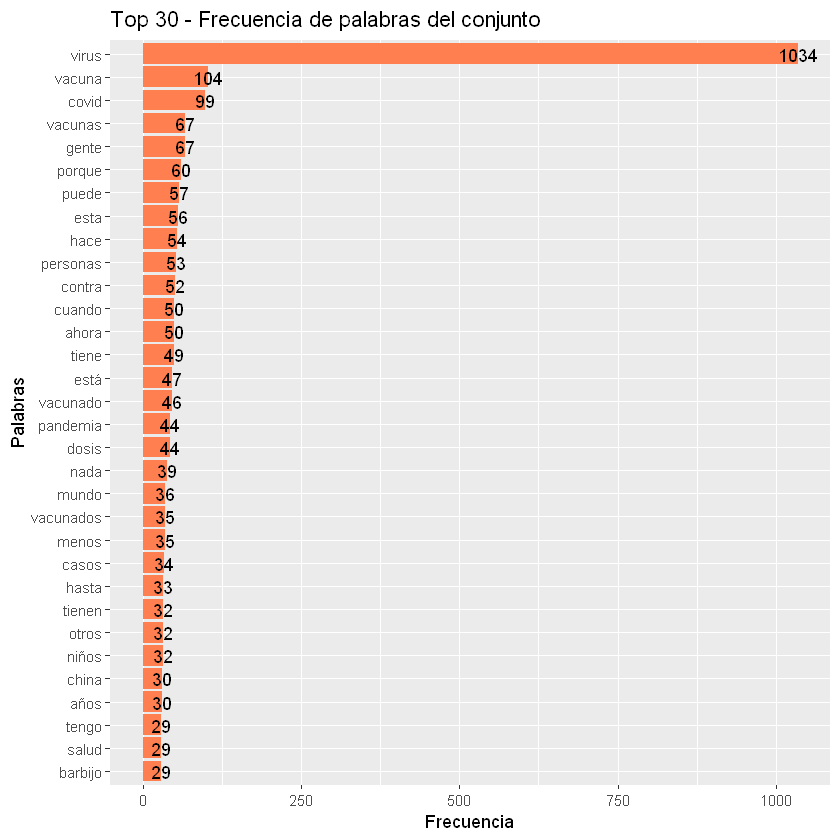

In [133]:
frecuencia_de_palabras(df_1)

In [134]:
#separar palabras
#resultado_1$cleaned_text <- strsplit(resultado_1$cleaned_text,split = ' ')

In [154]:
#agregando columna fecha a los dataframes
resultado_1$fecha <- as.Date(resultado_1$created_at)
resultado_2$fecha <- as.Date(resultado_2$created_at)

In [155]:
resultado_1$fecha[1]

[1] "2021-10-16"

In [137]:
#NO
    #creando dataframe
    #df <-data.frame(palabra = character(), stringsAsFactors=FALSE)
    #df[nrow(df) + 1,] = c("mmmaa")
 

In [138]:
#NO

    #accediento a cada una de las palabras
    #for (i in 1:length(resultado_1$cleaned_text)){

        #arreglo de cadenas del tweet i
        #str <- resultado_1$cleaned_text[i]

        #accediendo las cadenas del arreglo
        #for (j in 1:length(str[[1]])){
        #    print(str[[1]][j])

        #}
    #}


In [139]:
#https://rdrr.io/cran/rtweet/man/get_timeline.html
resultado_2 <- get_timeline("ABCDigital", n = 3000, retryonratelimit = TRUE, lang= 'es', geocode= geocodeinr, since = since, until= until, tweet_mode='extended' )

In [140]:
head(resultado_2, n=1)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
28191953,1449834688684699663,2021-10-17 20:28:21,ABCDigital,#ABCMundo|<U+0001F1EF><U+0001F1F2>Jamaica vive bajo la psicosis de los secuestros tras la desaparición en pocos días de dos niñas en el sureste de la isla caribeña. La primera de la niñas desaparecidas ya fue localizada este sábado. https://t.co/apHC0g5mLD,TweetDeck,236,NA,NA,NA,...,274476,4616,2009-04-01 20:49:43,TRUE,http://t.co/Vq9DNoLzUW,http://www.abc.com.py,NA,https://pbs.twimg.com/profile_banners/28191953/1612367692,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1443965194363940864/6c3MRRct_normal.jpg


In [141]:
#limpieza de texto y paso de datos a un dataframe
resultado_2 <- clean_text(resultado_2)
resultado_2 <- palabras_poco_significativas(resultado_2)
df_2 <- crear_dataframe(resultado_2)

head(df_2, n=3)

palabras
vive
bajo
psicosis


Selecting by n


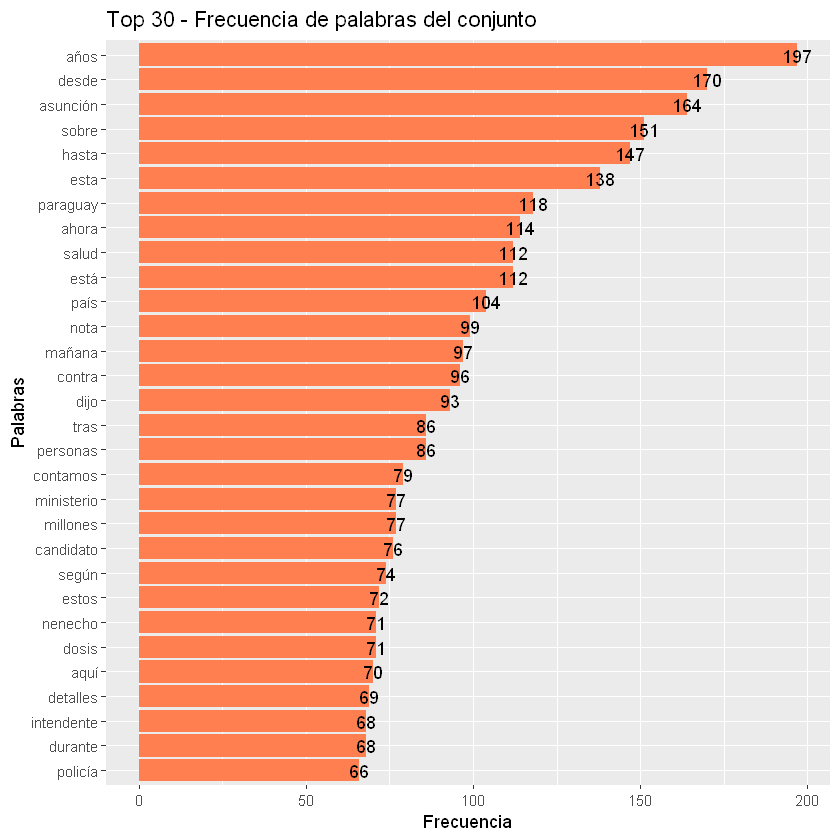

In [142]:
frecuencia_de_palabras(df_2)

In [143]:
#interseccion sin repeticion
conjunto_interseccion <- intersect(df_1,df_2)
head(conjunto_interseccion, n=5)


palabras
nunca
sido
mejor
sacar
plata


In [144]:
#union con repeticion
conjunto_union <- union_all(df_1,df_2)

#frecuencia
conjunto_union_frec <- conjunto_union %>% count(palabras, sort = TRUE)
head(conjunto_union_frec, n=5)

palabras,n
virus,1039
años,227
esta,194
desde,193
hasta,180


In [145]:
#conjunto interseccion con duplicados (para frecuencia)
interseccion_dup <- data.frame(palabras = character(), stringsAsFactors=FALSE)

for (row in 1:nrow(conjunto_union)) {
      temp_row <- conjunto_union[row,]

      #si la palabra en union esta en interseccion, ingresar palabra en interseccion_dup
      if (temp_row$palabras %in% conjunto_interseccion$palabras) {
         interseccion_dup[ nrow(interseccion_dup) + 1,] = c(temp_row$palabras)
      }
       
}

#frecuencia en interseccion
interseccion_dup_frec <- interseccion_dup %>% count(palabras, sort = TRUE)
head(interseccion_dup_frec, n=5)

palabras,n
virus,1039
años,227
esta,194
desde,193
hasta,180


## Frecuencia en el conjunto unión

Selecting by n


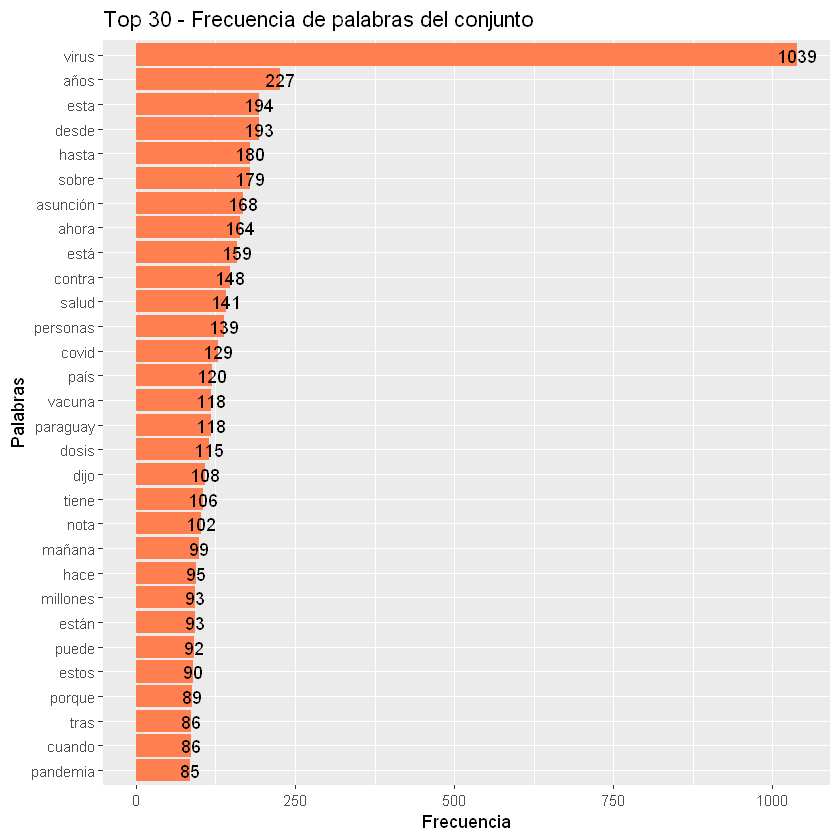

In [146]:
frecuencia_de_palabras(conjunto_union)

## Frecuencia del conjunto intersección 

Selecting by n


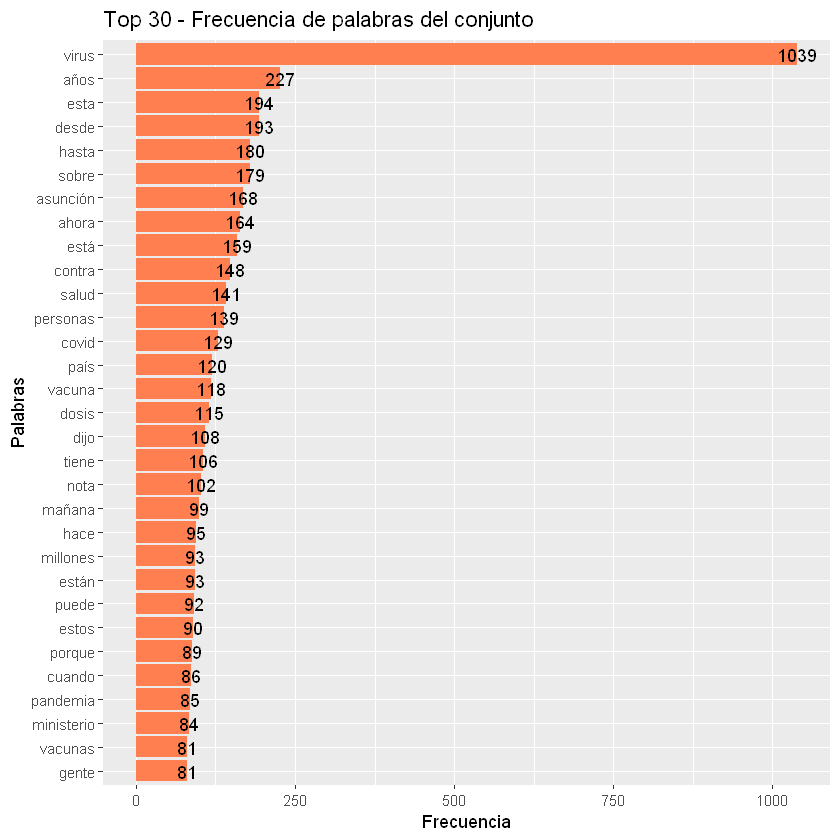

In [147]:
frecuencia_de_palabras(interseccion_dup)

## Conjunto diferencia

In [148]:
diferencia1 <- setdiff(df_1,df_2)
diferencia1

palabras
jubilación
sueldos
tienes
fórmula
avivan
suenos
dormidosnos
alejan
pandemias
experimento


In [58]:
diferencia2 <- setdiff(df_2,df_1)
diferencia2

palabras
puesto
estuvo
disponible
aplicaron
astrazeneca
feria
contará
interesante
variedad
comidas


## Gráfico de número de tweets por fecha. En el eje x las fechas, en el eje y el número de tweets. 

In [156]:
#union de tweets
union_tweets <- union_all(resultado_1,resultado_2)

In [157]:
aux <- union_tweets %>% count(fecha)
aux <-  aux[ order(aux$fecha, decreasing = TRUE),]
aux

fecha,n
2021-10-17,49
2021-10-16,336
2021-10-15,396
2021-10-14,516
2021-10-13,84
2021-10-12,88
2021-10-11,86
2021-10-10,142
2021-10-09,46
2021-10-08,80


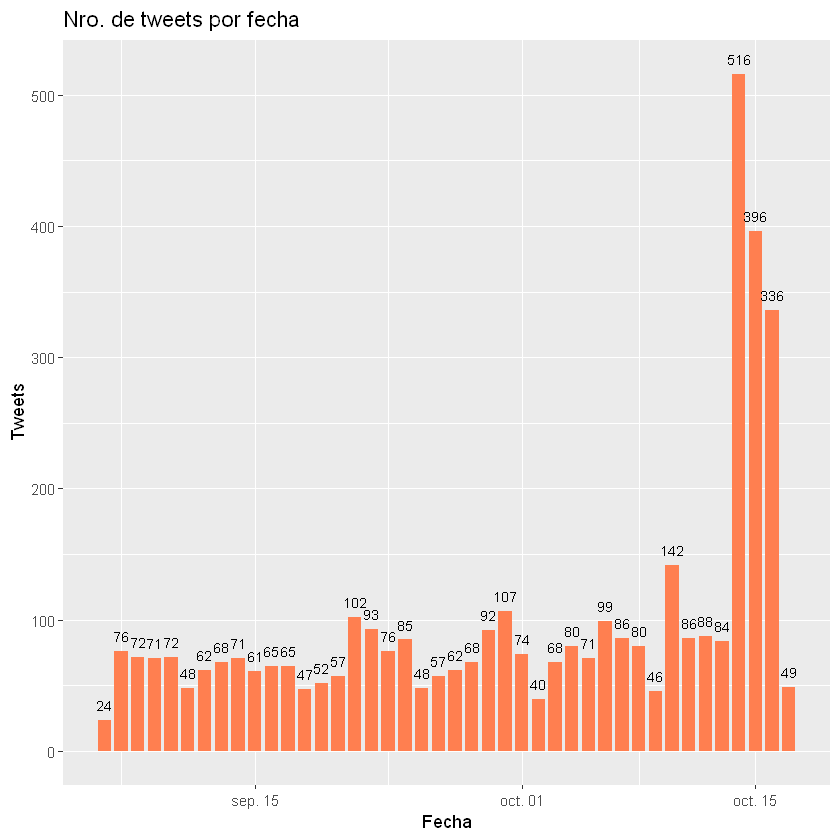

In [210]:
aux %>%
   ggplot(aes(x = fecha, y = n)) +
   geom_col(fill = "coral", width = 0.8) +
   geom_text(aes(label=n),vjust=-0.9, size=3)+
   #geom_text(aes(label=n))+
   xlab(NULL) +
   #coord_flip() +
   labs(x = "Fecha", y = "Tweets", title = "Nro. de tweets por fecha")
   #theme(axis.text.x = element_text(angle=40))
   #theme(text = element_text(size=20), axis.text.x = element_text(angle=90, hjust=1))
   #theme(text = element_text(size=17))

## Número de personas diferentes (usuarios) que escribieron tweets por fecha. En el eje x las fechas, en el eje y el número de usuarios. 


In [159]:
#cuenta nro de twwets de usuarios por fecha (para agrupar)
aux2 <- union_tweets %>% count(fecha, screen_name)
aux2
#head(union_tweets, n=1)

fecha,screen_name,n
2021-09-06,ABCDigital,24
2021-09-07,ABCDigital,76
2021-09-08,ABCDigital,72
2021-09-09,ABCDigital,71
2021-09-10,ABCDigital,72
2021-09-11,ABCDigital,48
2021-09-12,ABCDigital,62
2021-09-13,ABCDigital,68
2021-09-14,ABCDigital,71
2021-09-15,ABCDigital,61


In [160]:
#se elimina n ya que no se necesita
#con esta se tienen filas con datos unicos, sin repeticiones
col_permanece <- c("fecha", "screen_name")
aux2 <- aux2[col_permanece]
aux2

fecha,screen_name
2021-09-06,ABCDigital
2021-09-07,ABCDigital
2021-09-08,ABCDigital
2021-09-09,ABCDigital
2021-09-10,ABCDigital
2021-09-11,ABCDigital
2021-09-12,ABCDigital
2021-09-13,ABCDigital
2021-09-14,ABCDigital
2021-09-15,ABCDigital


In [161]:
#se agrupa por fecha
nro_usuarios_por_fecha <- aux2 %>% count(fecha)
nro_usuarios_por_fecha

fecha,n
2021-09-06,1
2021-09-07,1
2021-09-08,1
2021-09-09,1
2021-09-10,1
2021-09-11,1
2021-09-12,1
2021-09-13,1
2021-09-14,1
2021-09-15,1


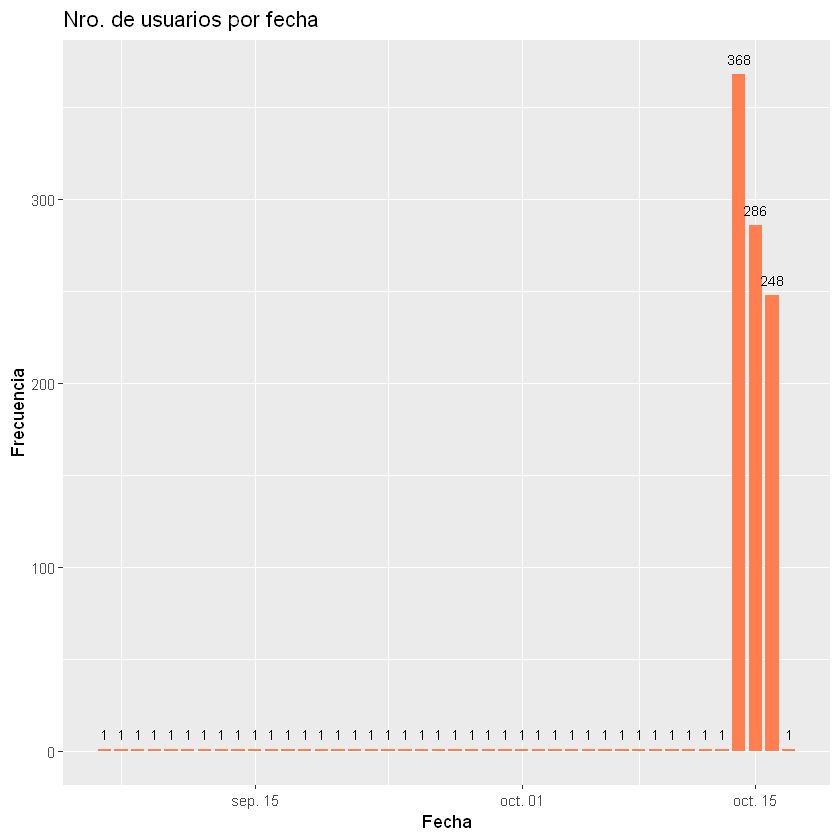

In [190]:
nro_usuarios_por_fecha %>%
       ggplot(aes(x = fecha, y = n)) +
       geom_col(fill = "coral", width = 0.8) +
       geom_text(aes(label=n),vjust=-0.9,size=3)+
       #geom_text(aes(label=n))+
       xlab(NULL) +
       #coord_flip() +
       labs(x = "Fecha", y = "Frecuencia", title = "Nro. de usuarios por fecha")
       #theme(axis.text.x = element_text(angle=40))

## 7.Número de tweets por usuarios. En el eje x los usuarios, en el eje y el número de tweets

In [200]:
aux3 <- union_tweets %>% count(screen_name)
aux3 <-  aux3[ order(aux3$n, decreasing = TRUE),]
aux3

screen_name,n
ABCDigital,3000
jose_virus,12
Chris_aldemar,9
achahuasoncco,6
brujita_pp,6
JhonnySanchis,6
hugoalca71,5
jgsp12071979,5
JuanRibeyromano,5
Yimi80,5


Selecting by n


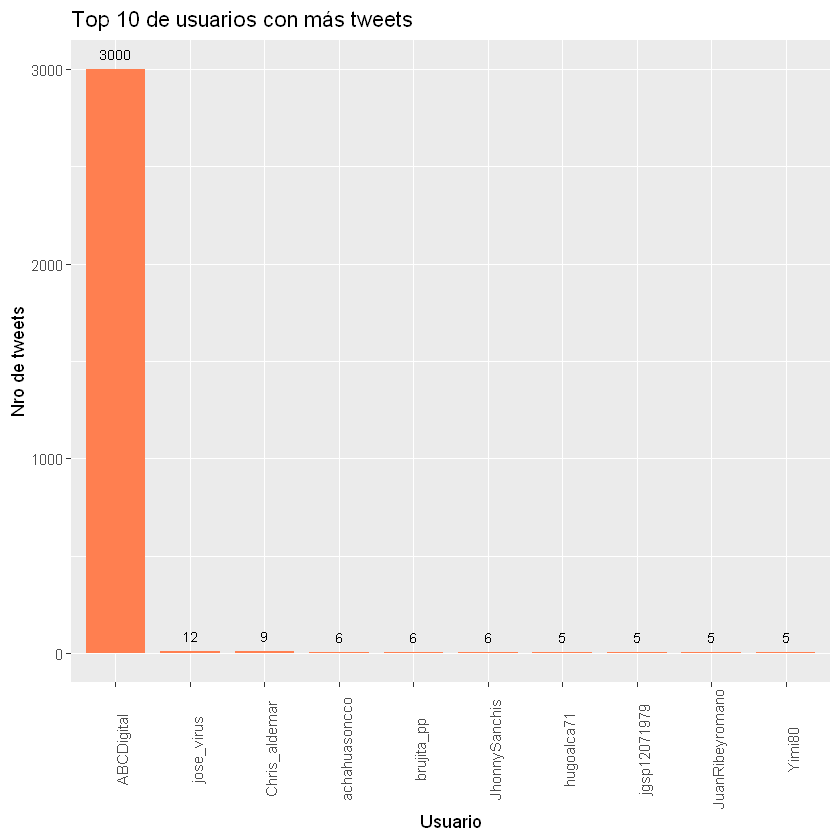

In [208]:
aux3 %>% 
       top_n(10) %>% #top 10
       mutate(screen_name = reorder(screen_name, desc(n))) %>% #ordenar descendentemente

       ggplot(aes(x = screen_name, y = n)) +
       geom_col(fill = "coral", width = 0.8) +
       geom_text(aes(label=n),vjust=-0.9,size=3)+
       #geom_text(aes(label=n))+
       xlab(NULL) +
       #coord_flip() +
       labs(x = "Usuario", y = "Nro de tweets", title = "Top 10 de usuarios con más tweets")+
       theme(axis.text.x = element_text(angle=90))

In [209]:
save.image() #guardar los datos de la noteboook